# EECS 531: Computer Vision Assignment 2
**David Fan**

3/16/18

# Exercise 3

## Problem Description
In this exercise I will show that convolving a 2D convolution kernel with an image is approximately equivalent to multiplying the transforms of the kernel and the image and then applying the inverse transform.

In [1]:
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
from scipy import signal

First let's import an image and do some preprocessing.

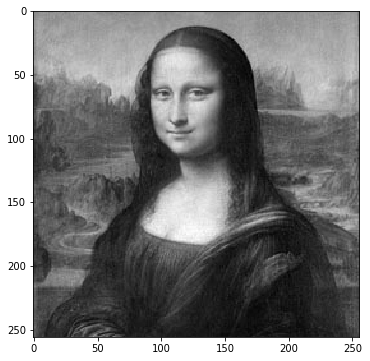

In [102]:
img = io.imread('images/mona.jpg', as_grey=True)
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
ax.imshow(img, cmap='gray');

We'll be using a simple 5x5 Gaussian Kernel here.

In [6]:
g = 1.0/256 * np.array([[1, 4, 6, 4, 1],
                        [2, 8, 12, 8, 2],
                        [6, 24, 36, 24, 6],
                        [2, 8, 12, 8, 2],
                        [1, 4, 6, 4, 1]])

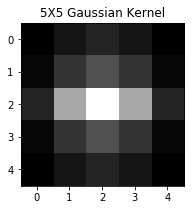

In [109]:
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
ax.set_title('5X5 Gaussian Kernel')
ax.imshow(g, cmap='gray');

In [131]:
h1 = signal.convolve2d(img, g, mode='full')
H1 = np.fft.fft2(h1)

Here we can see the effect of convolving the 5x5 gaussian on the Mona Lisa

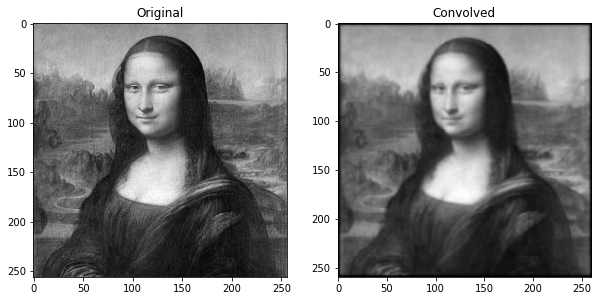

In [111]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(121)
ax1.set_title('Original')
ax1.imshow(img, cmap='gray')
ax2 = plt.subplot(122)
ax2.set_title('Convolved')
ax2.imshow(h1, cmap='gray');

Now let us compute the transforms of the kernel and the image and multiply them. Then apply the inverse transform to get our second resulting image. We can then compare the two pixel-by-pixel to see if there's a significant difference

In [153]:
# Pad the image and kernel with 0s
pad_img = np.pad(img, ((0,4), (0,4)), 'constant')
pad_g = np.pad(g, ((0,255),(0,255)), 'constant')
np.shape(pad_g)

(260, 260)

In [154]:
# Compute the transforms of the padded image and kernel
transformed_img = np.fft.fft2(pad_img)
transformed_g = np.fft.fft2(pad_g)

In [155]:
# Multiply the transforms
H2 = np.multiply(transformed_img, transformed_g)

In [156]:
# Inverse the FFT
h2 = np.fft.ifft2(H2)

In [163]:
mse1=(np.abs(H1-H2) ** 2 ).mean()
mse2=(np.abs(h1-h2) ** 2 ).mean()
print("Mean Squared Error between H1 and H2:", mse1)
print("Mean Squared Error between h1 and h2:", mse2)

Mean Squared Error between H1 and H2: 3.680223497385986e-26
Mean Squared Error between h1 and h2: 2.7590684768732907e-31


Here we can see our mean squared errors are _extremely low_, so we **should** be happy right? Not quite... it seems that our h2 array is still complex:

In [164]:
print(h2)

[[0.00181714+8.98961385e-17j 0.00911634+1.62557347e-16j
  0.02015705+3.09737491e-16j ... 0.01760817+4.02058932e-16j
  0.00753877+2.03097701e-16j 0.00144868+6.72832096e-17j]
 [0.00542078+2.32508970e-16j 0.02718051+2.22475587e-16j
  0.06005753+2.82705196e-16j ... 0.05306962+3.38979673e-16j
  0.02270822+1.81835793e-16j 0.00436135+7.78201268e-17j]
 [0.01629514+6.35419968e-16j 0.08172078+3.69523202e-16j
  0.18061756+1.23961950e-16j ... 0.15904034+6.62164670e-17j
  0.0680021 +1.06433571e-16j 0.01305341+9.06552724e-17j]
 ...
 [0.01190287+1.26323992e-16j 0.05804025+7.59566650e-17j
  0.12247361+1.06223518e-16j ... 0.10854069+2.42522686e-17j
  0.05377937+3.17565932e-17j 0.01152026+2.93707681e-17j]
 [0.00396689+2.26637602e-17j 0.019327  +7.47764498e-18j
  0.04075802+1.47134871e-17j ... 0.03607432+1.13633635e-17j
  0.01787714+9.53450914e-18j 0.00383322+8.40112039e-18j]
 [0.00133286+3.68360039e-19j 0.00646415-4.01221229e-19j
  0.01358119+3.49265860e-17j ... 0.01174811+2.14271956e-17j
  0.0058353 +1

Unfortunately, this means that we can't show it as an image to be able to visually compare the results.

## Potential Extensions
Had I had more time, (which is unfortunate to say given how many extensions the class was given for this assignment) I would have liked to use linear algebra to mathematically show that our result should hold given any convolutional kernel and any transform.